# Color Theory

Contains material from 
https://www.youtube.com/watch?v=M_eA66NOSik

- Francesca Samsel (Researcher, Texas advanced computing center, Artist)
- Danielle Szafir (Assist. Prof, Boulder, Colorado)
- Karen Schloss (Assist. Prof, Dept. Psychology, Wisconsin, MA) Viz that are easy to interpret

## Principles of Color Discriminability (Danielle Szafir)
**Just notieceable difference (JND)** The smallest color difference that can be reliably detected.

### Color Spaces
**Color as Wavelength** Use wavelength of light to designate a color (not very rich way of thinking)

**sRGB** The way computers represent color (similar to what happens in the eye), but NOT perceptually uniform, i.e. Equal distance in RGB != Equal perceived distance

**CIELAB** Lightness, how much red/green is present (A), how much yellow/blue is present(B) (forms a hue/saturation plane)
CIELAB is made such that Euclidean distance approximates perceived distance (approximately perceptually uniform)

**HSL** Hue (H) - the color, Saturation (S) - how intense, or how close to gray, Lightness (L) - how much white/black is present; Close to how artists think of color
in nature, the colors of objects far away are less saturated; colormixes with white are called *tints*, colormixes with black are called *shades*

HSL (*artistic space*) is a good way of talking about and designing colors, but just as RGB (*computer space*) is not perceptually uniform. CIELAB (*perceptural space*) is uniform but is unintuitive to talk about.

Color encodings (should) tend to rely on lightness steps (lightness monotonicity), while minimizing hue steps BUT colormaps that have many namable colors (highly categorizable) 

### Color Differences
Problem of JND: real world is noisy (ambient light, monitors are not perfect, paper, ...)

Very large differences between colors tend to be non-meaningful => *Cognitive comparision* becomes more meaningful

*Color Naming* Colors that have different names are easier to discriminate and cluster
### Challenges in Visualization

Categorical (use Names) vs sequential encoding (use JND, e.g. lightness)
For example divergent colormaps divide data into two groups that are *categorically distinguishable*
Within each group data should be continuously distinguishable

Expert-designed color-ramps are often **not linear in CIELAB**

# Colormap design
Reda & Szafir (2021) Rainbows revisited: Modeling effective colormap design for graphical inference

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9222327
## Traditional guidelines
- *Order* a good colormap sequence should be naturally orderable (e.g. from a cool blue color to warm red)
- *Continuity* the colormap should only reflect actual differences in the data without creating artificial boundaries
- *Perceptual Uniformity* adjacent colors should reflect even perceptual distances throughout the sequence, such that a step in magnitude is matched by an equivalent perceptual step in color

=> advocate ramps with monotonically increasing luminance

=> rainbows tend to create boundaries between hues (hue banding) that may "mislead viewers"
=> rainbows like jet make it difficult to judge perceptual distances

=> so why do rainbows still work better than sequential maps?

## Conclusion
Colormap must not only help perceive low-level data features but also facilitate accurate interpretation and inference. Performance in the latter is correlated to **cognitive properties** of colormaps rather than *perceptual*.

## Color cognition for visualization (Karen Schloss)

Factors involved in colormap design
- perception (you can perceive as different colors)
- cognition (you can name different colors)
- aesthetics (similar, cool hues and lightness contrasts are preferable)
- affective impression (what emotions colors evoke)
- semantic interpretation (colors map to different concepts, observers have expectations)

### Semantics
A visualization encodes a message that the designer transmits and the observer receives 

It is easier to interpret encoding systems that match expectations (for example a paper trash can is white)

**Semantic discriminabilty dominates perceptual discriminability** 

**Dark-is-more bias**: darker colors map to larger quantities
People interpret colormaps faster where dark is more.

Opaque-is-more bias: If colors vary in opacity (lightness) then dark means more on a light background (like a cloud in daylight), while light means more on dark backgound (light-emitting stars in universe)

## Artistic color contrast theory, color interaction and the cost of one-size fits all (Francesca Samsel)

### Color Contrast, not hue enables to see more detail
Things that make contrast in a painting: *hue, lightness (how light, strongest contrast), saturation (how intense), complimentary (visual volume of color), cool warm, proportion, simultaneity (hues that abutt one another have a visual vibration)*

Luminance is the strongest kind of contrast

*The key is allocating the types and levels of contrast that best enable the task and purpose of the visualization*

There is a **contrast budget**: contrast directs attention, e.g. saturated colors guide to the important parts of a painting, but if there is too much it is distracting.


There is **contrast of simultaneity** when two hues of full saturation are next to each other they generate a visual vibration. Lower saturation can make it better

On a wide data range, a perceptually uniform colormap makes it hard to focus on any part of the picture. The brain can easily focus on parts of a picture with the same color say

### Color interaction

Lower saturation calms the picture and every color will be seen.

Using too much saturation makes it hard to add anything to the picture because it will not be seen.

There is **cognitive load**: It is tiring to look at too much contrast and saturation. Lower the *volume of contrast*.

## Useful links
- https://sciviscolor.org/ (ColorMoves for composing colormaps and seeing them work on a dataset)
- http://cu-visualab.org/ColorCrafter/ Alpha version does not work well

In [1]:

import numpy as np
import json
from bs4 import BeautifulSoup
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

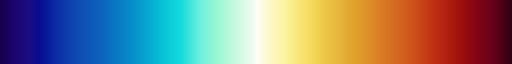

In [2]:
def xml2cm( file, name='custom_colormap') :
    """Converts a paraview compatible colormap xml file to a matplotlib colormap
    
    https://www.paraview.org/Wiki/Colormaps
    Parameters
    ----------
    file: file-like
        xml file containing colormap
    name: str
        name to give to the colormap.
    Returns
    -------
    cmap : matplotlib.colors.LinearSegmentedColormap
    """
    soup = BeautifulSoup(open(file), 'xml')
    unified = []
    for s in soup.find_all('Point'):
        position  = float(s['x'])
        color = (float(s['r']),float(s['g']),float(s['b']))
        unified.append( (position, color))

    return mcolors.LinearSegmentedColormap.from_list( name, unified)
my_cmap = xml2cm( 'div1-blue-orange-div.xml')
my_cmap

In [3]:
def cm2json(  cmap, file):
    """ Create a json file that can be imported into paraview 
    
    Format inferred from paraview's export function
    Parameters
    ----------
    cmap : matplotlib.colors.Colormap
    file: file-like
        json file name where the colormap is written
    
    """
    gradient= np.linspace( 0,1, cmap.N)
    xrgb_list = []
    for g in gradient:
        rgb = mcolors.to_rgb( cmap(g))
        xrgb_list.append( (g, rgb[0],rgb[1],rgb[2])) # x r g b 
        
    pc = [{"Colorspace": "User",
           "Creator": "Matthias",
           "Name" : cmap.name,
           "RGBPoints" : list( sum(xrgb_list,())) # flatten list
          }]
    with open( file, "w") as f:
        json.dump(pc, f, indent=4 )
cm2json( my_cmap, 'my_cmap.json')